### Baseline Model

A baseline model is a trivial solution to your forecasting problem. It relies on heuristics or simple statistics and is usually the simplest solution. It does not require
model fitting, and it is easy to implement.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


pd.options.mode.chained_assignment = None

In [20]:
df = pd.read_csv('./jj.csv')
df.head()

,date,data
0,1960-01-01,0.71
1,1960-04-01,0.63
2,1960-07-02,0.85
3,1960-10-01,0.44
4,1961-01-01,0.61


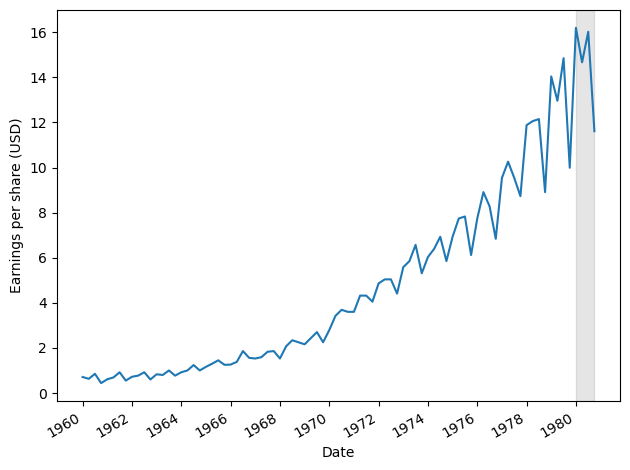

In [21]:
#Plot data with train/test split
fig, ax = plt.subplots()

ax.plot(df['date'], df['data'])
ax.set_xlabel('Date')
ax.set_ylabel('Earnings per share (USD)')
ax.axvspan(80, 83, color='#808080', alpha=0.2)

plt.xticks(np.arange(0, 81, 8), [1960, 1962, 1964, 1966, 1968, 1970, 1972, 1974, 1976, 1978, 1980])

fig.autofmt_xdate()
plt.tight_layout()

#plt.savefig('figures/CH02_F01_peixeiro.png', dpi=300)

Uur data has a trend, since it is increasing over time. Also, we have a seasonal pattern, since over the course of a year, or four quarters, we can observe peaks and troughs repeatedly. This means that we have seasonality. This means that we have seasonality. 

In [22]:
#Split to train/test
train = df[:-4]
test = df[-4:]

### Predict historical mean


In [23]:
#Predict historical mean
historical_mean = np.mean(train['data'])
historical_mean

np.float64(4.308499987499999)

This gives a value of 4.31 USD. This means that from 1960 to the end of 1979, the quarterly EPS of Johnson & Johnson is on average 4.31 USD.

In [24]:
#Now we will naively forecast this value for each quarter of 1980.
test.loc[:,'pred_mean'] = historical_mean

test

,date,data,pred_mean
80,1980-01-01,16.20,4.3085
81,1980-04-01,14.67,4.3085
82,1980-07-02,16.02,4.3085
83,1980-10-01,11.61,4.3085


In [25]:
# error metric -> we will use the mean absolute percentage error (MAPE). 
# It is a measure of prediction accuracy for forecasting methods 
def mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [26]:
mape_hist_mean = mape(test['data'], test['pred_mean'])
mape_hist_mean

np.float64(70.00752579965119)

This means that our baseline deviates by 70% on average from the observed quarterly EPS of Johnson & Johnson in 1980.

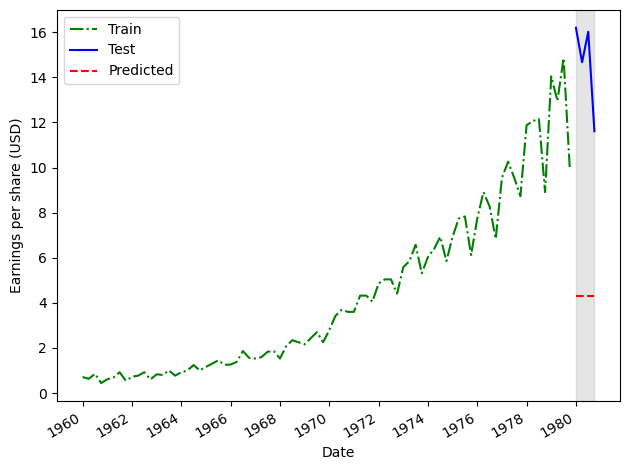

In [28]:
fig, ax = plt.subplots()

ax.plot(train['date'], train['data'], 'g-.', label='Train')
ax.plot(test['date'], test['data'], 'b-', label='Test')
ax.plot(test['date'], test['pred_mean'], 'r--', label='Predicted')
ax.set_xlabel('Date')
ax.set_ylabel('Earnings per share (USD)')
ax.axvspan(80, 83, color='#808080', alpha=0.2)
ax.legend(loc=2)

plt.xticks(np.arange(0, 85, 8), [1960, 1962, 1964, 1966, 1968, 1970, 1972, 1974, 1976, 1978, 1980])

fig.autofmt_xdate()
plt.tight_layout()

#plt.savefig('figures/CH02_F06_peixeiro.png', dpi=300)

### Predict Last year mean

In [ ]:
#Mean of the last year trains set (Trimestre)
last_year_mean = np.mean(train['data'][-4:])
last_year_mean

np.float64(12.96)

This gives us an average EPS of $12.96

In [30]:
test.loc[:, 'pred__last_yr_mean'] = last_year_mean

test

,date,data,pred_mean,pred__last_yr_mean
80,1980-01-01,16.20,4.3085,12.96
81,1980-04-01,14.67,4.3085,12.96
82,1980-07-02,16.02,4.3085,12.96
83,1980-10-01,11.61,4.3085,12.96


In [31]:
mape_last_year_mean = mape(test['data'], test['pred__last_yr_mean'])
mape_last_year_mean

np.float64(15.5963680725103)

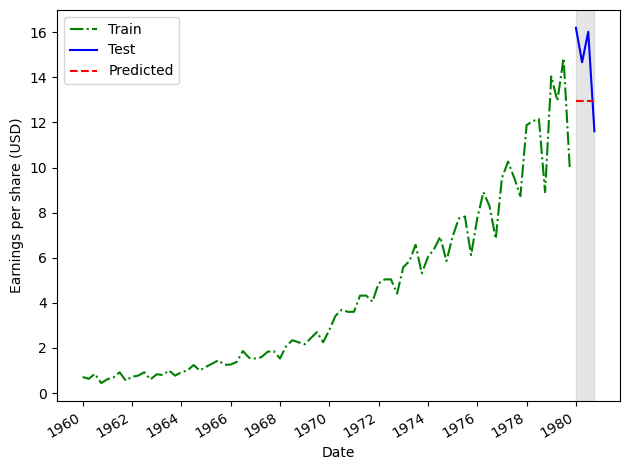

In [32]:
fig, ax = plt.subplots()

ax.plot(train['date'], train['data'], 'g-.', label='Train')
ax.plot(test['date'], test['data'], 'b-', label='Test')
ax.plot(test['date'], test['pred__last_yr_mean'], 'r--', label='Predicted')
ax.set_xlabel('Date')
ax.set_ylabel('Earnings per share (USD)')
ax.axvspan(80, 83, color='#808080', alpha=0.2)
ax.legend(loc=2)

plt.xticks(np.arange(0, 85, 8), [1960, 1962, 1964, 1966, 1968, 1970, 1972, 1974, 1976, 1978, 1980])

fig.autofmt_xdate()
plt.tight_layout()

#plt.savefig('figures/CH02_F07_peixeiro.png', dpi=300)

### Predict last know value


Therefore, we could suppose that using the last known value of the training set as a
baseline model will give us even better forecasts, which would translate to a MAPE
closer to 0%. Let’s test that hypothesi

In [33]:
last = train['data'].iloc[-1]
last

np.float64(9.99)

In [34]:
test.loc[:, 'pred_last'] = last

test

,date,data,pred_mean,pred__last_yr_mean,pred_last
80,1980-01-01,16.20,4.3085,12.96,9.99
81,1980-04-01,14.67,4.3085,12.96,9.99
82,1980-07-02,16.02,4.3085,12.96,9.99
83,1980-10-01,11.61,4.3085,12.96,9.99


In [35]:
mape_last = mape(test['data'], test['pred_last'])
mape_last

np.float64(30.457277908606535)

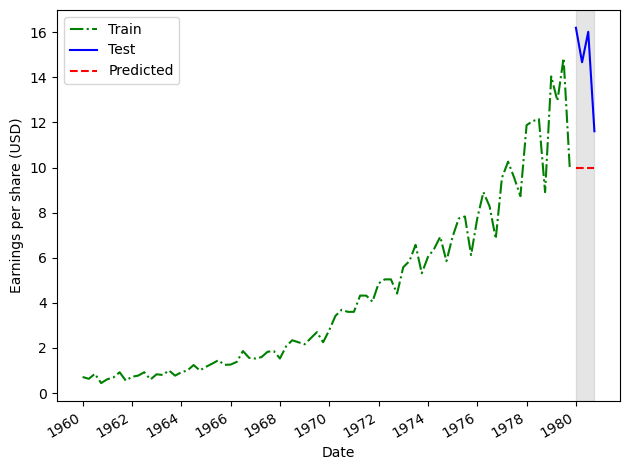

In [36]:

fig, ax = plt.subplots()

ax.plot(train['date'], train['data'], 'g-.', label='Train')
ax.plot(test['date'], test['data'], 'b-', label='Test')
ax.plot(test['date'], test['pred_last'], 'r--', label='Predicted')
ax.set_xlabel('Date')
ax.set_ylabel('Earnings per share (USD)')
ax.axvspan(80, 83, color='#808080', alpha=0.2)
ax.legend(loc=2)

plt.xticks(np.arange(0, 85, 8), [1960, 1962, 1964, 1966, 1968, 1970, 1972, 1974, 1976, 1978, 1980])

fig.autofmt_xdate()
plt.tight_layout()

#plt.savefig('figures/CH02_F08_peixeiro.png', dpi=300)

### Naive seasonal forecast


There are clear cyclical patterns in our data,and that is a piece of information that we could use to construct one last baseline: the naive seasonal forecast.

The naive seasonal forecast takes the last observed cycle and repeats it into the future.
In our case, a full cycle occurs in four quarters

In [37]:
test.loc[:, 'pred_last_season'] = train['data'][-4:].values

test

,date,data,pred_mean,pred__last_yr_mean,pred_last,pred_last_season
80,1980-01-01,16.20,4.3085,12.96,9.99,14.04
81,1980-04-01,14.67,4.3085,12.96,9.99,12.96
82,1980-07-02,16.02,4.3085,12.96,9.99,14.85
83,1980-10-01,11.61,4.3085,12.96,9.99,9.99


In [38]:
mape_naive_seasonal = mape(test['data'], test['pred_last_season'])
mape_naive_seasonal

np.float64(11.561658552433654)

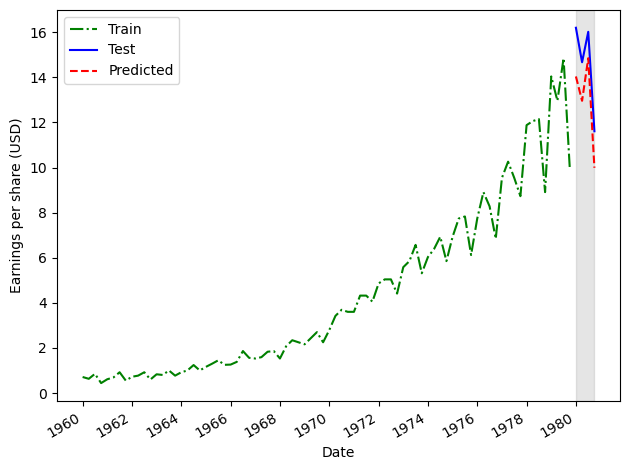

In [39]:
fig, ax = plt.subplots()

ax.plot(train['date'], train['data'], 'g-.', label='Train')
ax.plot(test['date'], test['data'], 'b-', label='Test')
ax.plot(test['date'], test['pred_last_season'], 'r--', label='Predicted')
ax.set_xlabel('Date')
ax.set_ylabel('Earnings per share (USD)')
ax.axvspan(80, 83, color='#808080', alpha=0.2)
ax.legend(loc=2)

plt.xticks(np.arange(0, 85, 8), [1960, 1962, 1964, 1966, 1968, 1970, 1972, 1974, 1976, 1978, 1980])

fig.autofmt_xdate()
plt.tight_layout()

#plt.savefig('figures/CH02_F09_peixeiro.png', dpi=300)

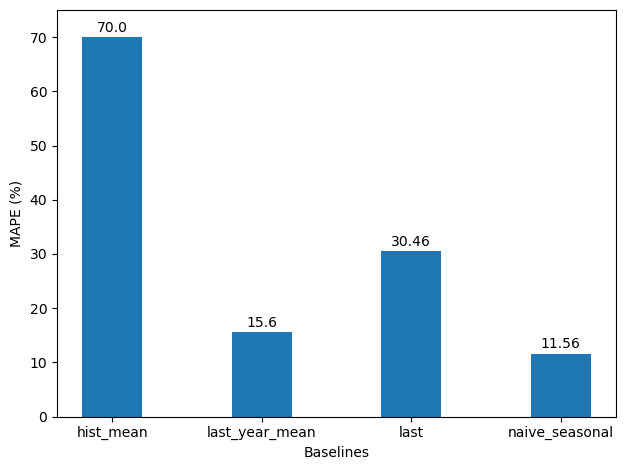

In [40]:

fig, ax = plt.subplots()

x = ['hist_mean', 'last_year_mean', 'last', 'naive_seasonal']
y = [70.00, 15.60, 30.46, 11.56]

ax.bar(x, y, width=0.4)
ax.set_xlabel('Baselines')
ax.set_ylabel('MAPE (%)')
ax.set_ylim(0, 75)

for index, value in enumerate(y):
    plt.text(x=index, y=value + 1, s=str(value), ha='center')

plt.tight_layout()

#plt.savefig('figures/CH02_F10_peixeiro.png', dpi=300)